In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
data = pd.read_csv('data.csv')
n = len(data)
num_plays = data['play_id']

0         28.72
1         24.75
2         20.97
3         26.41
4        -19.41
          ...  
116291    20.93
116292   -37.27
116293   -34.10
116294    14.16
116295    13.56
Name: player_x, Length: 116296, dtype: float64
0        -19.61
1         -9.47
2        -11.14
3        -18.99
4         19.95
          ...  
116291    -2.87
116292    -9.87
116293   -11.99
116294    18.58
116295     7.91
Name: player_y, Length: 116296, dtype: float64


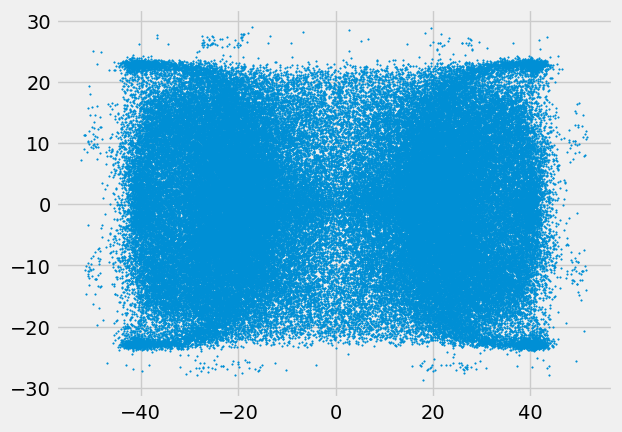

In [2]:
print(data['player_x'])
print(data['player_y'])
plt.scatter(data['player_x'], data['player_y'], marker='o', s=1)
plt.show()

In [3]:
play_types = data['play_type'].unique().ravel()
play_type_dict = {value: index for index, value in enumerate(play_types)}
num_plays = len(play_types)
subsequent_play = np.zeros((num_plays, num_plays))

current_play_num = 0
for i in range(n):
    current_play = data['play_type'][i]
    if current_play_num == data['play_id'][i]:
        continue
    elif data['play_id'][i] == 1:
        current_play_num = 1
    else:
        previous_play = data['play_type'][i-1]
        current_play_num += data['play_id'][i]-data['play_id'][i-1]
        subsequent_play[play_type_dict[previous_play]][play_type_dict[current_play]] += 1

for i in range(len(subsequent_play)):
    total = subsequent_play[i].sum()
    for j in range(len(subsequent_play[i])):
        
        subsequent_play[i][j] = subsequent_play[i][j] / total * 100

In [27]:
7 % 3

1

In [ ]:
play_type_dict = {index: value for index, value in enumerate(play_types)}

num_plots = len(subsequent_play)
print(num_plots)
fig, axes = plt.subplots(int(num_plots/3), 3, figsize=(15, 3*num_plots))

for i in range(len(subsequent_play)):
    iy = i % 3
    ax = axes[i//3, iy]
    #print(list(play_type_dict.values()), subsequent_play[i])
    df = pd.DataFrame(columns =["play", "percent"] )
    for j in range(len(subsequent_play[i])):
        df.at[j, "play"] = list(play_type_dict.values())[j]
        df.at[j, "percent"] = subsequent_play[i][j]
    df = df.sort_values("percent", ascending = True)
    #print(df)
    #plt.barh(list(play_type_dict.values()), subsequent_play[i])
    ax.barh(df.play, df.percent, color='skyblue')
    ax.set_title(play_type_dict[i])
    ax.set_xlabel("Percent")
    ax.set_ylabel("Subsequent play")
    ax.invert_yaxis()  # Invert y-axis to have bars in ascending order
    
plt.tight_layout()
plt.show()



18


In [5]:
result_types = data['result_type'].unique()
num_results = len(result_types)
result_type_dict = {value: index for index, value in enumerate(result_types)}
sequences = {}
current_sequence = []
current_play_id = 0
current_sequence_id = data['sequence_id'][0]
i = 0

while i < n:
    if current_sequence_id == data['sequence_id'][i]:
        if current_play_id == data['play_id'][i]:
            current_sequence.append(data['play_type'][i])
            current_play_id += 1
            i += 1
        elif current_play_id < data['play_id'][i]:
            current_play_id = data['play_id'][i]
        else:
            i += 1
    else:
        sequence = tuple(current_sequence)
        result = data['result_type'][i-1]
        result_pts = data['result_pts'][i-1]
        if  pd.isnull(result_pts):
            result_pts = 0
        if sequence in sequences:
            sequences[sequence][result_type_dict[result]] += 1
            sequences[sequence][-2] += result_pts
            sequences[sequence][-3] = data[]
        else:
            sequences[sequence] = np.zeros(num_results+2)
            sequences[sequence][result_type_dict[result]] += 1
            sequences[sequence][-2] += result_pts
        current_sequence = []
        current_sequence_id = data['sequence_id'][i]
        current_play_id = data['play_id'][i]

In [6]:
sequence_list = list(sequences.keys())
num_sequences = len(sequence_list)
for i in range(num_sequences):
    total = sequences[sequence_list[i]][:-2].sum()
    sequences[sequence_list[i]][-1] = total
    sequences[sequence_list[i]][-2] = sequences[sequence_list[i]][-2] / total
    for j in range(num_results):
        sequences[sequence_list[i]][j] = sequences[sequence_list[i]][j] / total * 100



Points per sequence:  0.5990566037735849
Number of sequences:  1272.0


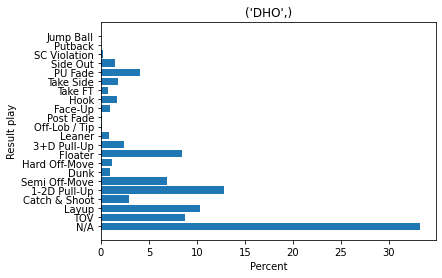

Points per sequence:  0.7828539199097575
Number of sequences:  1773.0


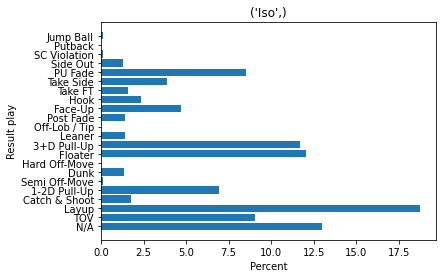

Points per sequence:  0.5483039079547709
Number of sequences:  5041.0


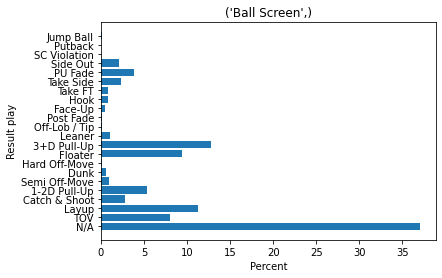

Points per sequence:  0.6001410437235543
Number of sequences:  1418.0


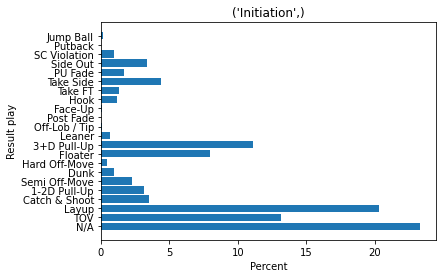

Points per sequence:  0.7512520868113522
Number of sequences:  1198.0


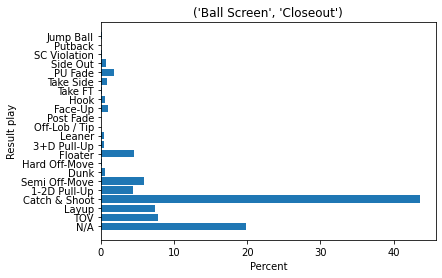

Points per sequence:  0.5311004784688995
Number of sequences:  418.0


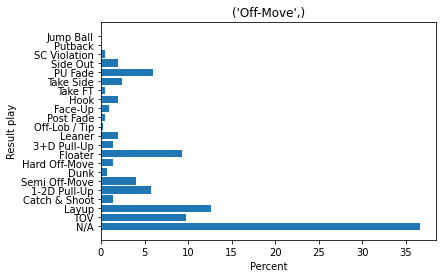

Points per sequence:  0.7859007832898173
Number of sequences:  383.0


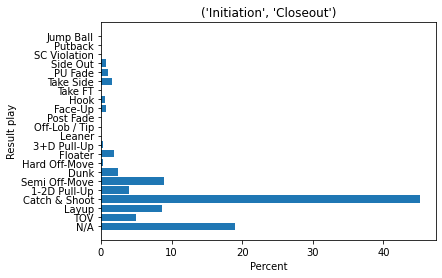

Points per sequence:  0.8832417582417582
Number of sequences:  728.0


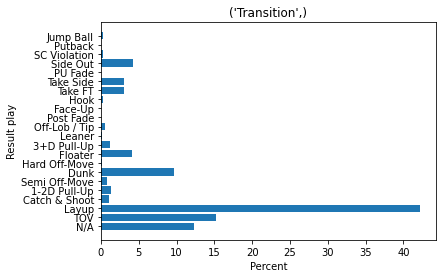

Points per sequence:  0.5222222222222223
Number of sequences:  270.0


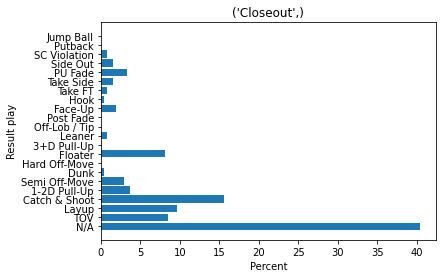

Points per sequence:  1.2191780821917808
Number of sequences:  803.0


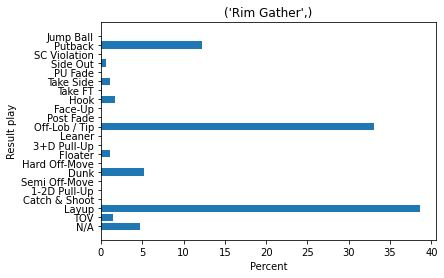

Points per sequence:  1.184265010351967
Number of sequences:  483.0


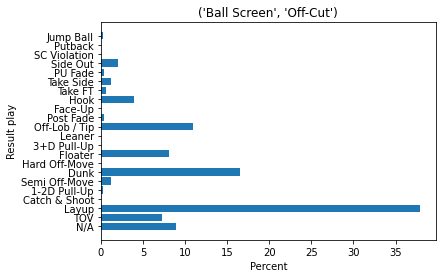

Points per sequence:  0.6867924528301886
Number of sequences:  265.0


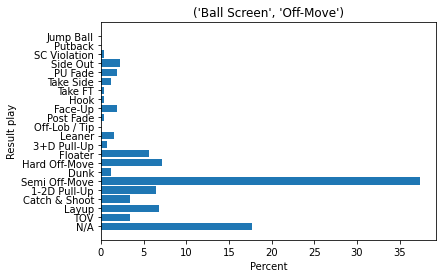

Points per sequence:  0.9074889867841409
Number of sequences:  227.0


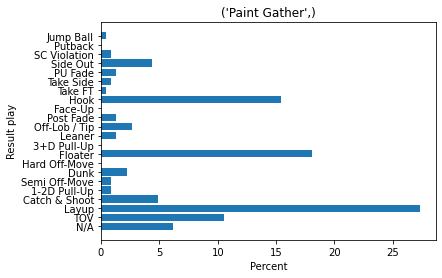

Points per sequence:  0.788235294117647
Number of sequences:  255.0


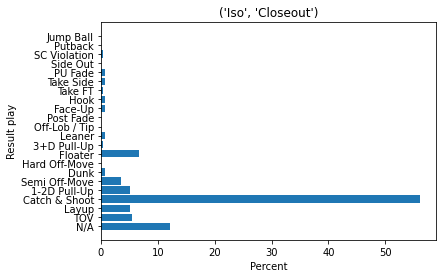

Points per sequence:  0.2890625
Number of sequences:  512.0


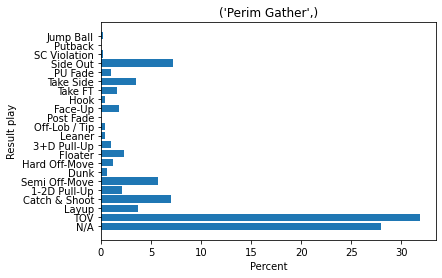

Points per sequence:  0.7512116316639742
Number of sequences:  619.0


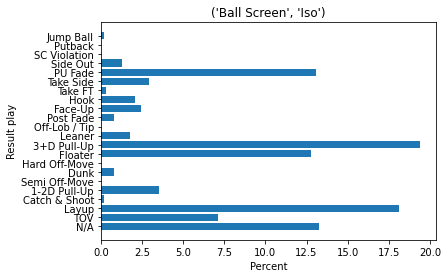

Points per sequence:  0.7407407407407407
Number of sequences:  540.0


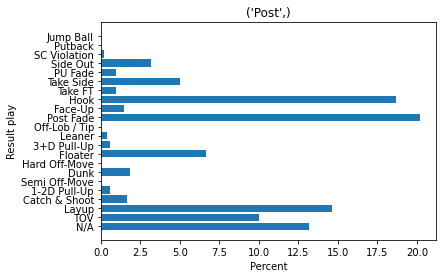

Points per sequence:  1.1193415637860082
Number of sequences:  243.0


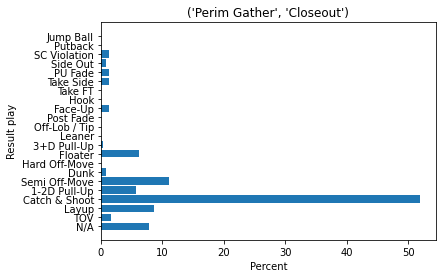

Points per sequence:  0.9358490566037736
Number of sequences:  265.0


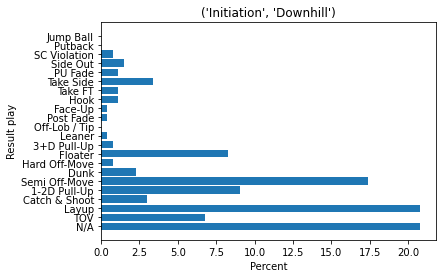

Points per sequence:  1.127579737335835
Number of sequences:  533.0


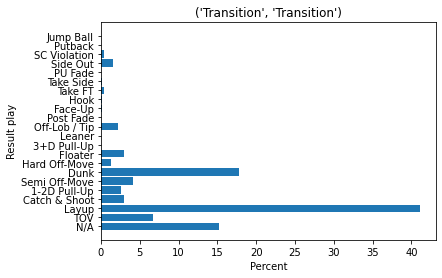

Points per sequence:  0.9126984126984127
Number of sequences:  252.0


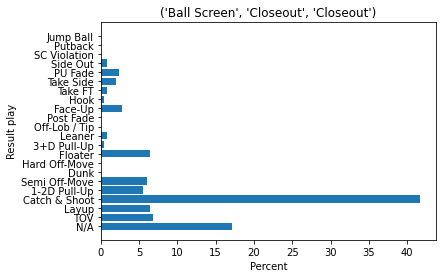

Points per sequence:  0.851145038167939
Number of sequences:  262.0


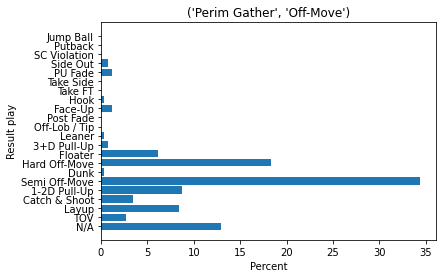

Points per sequence:  0.4249084249084249
Number of sequences:  273.0


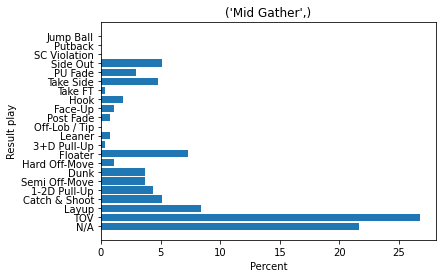

Points per sequence:  0.7721518987341772
Number of sequences:  237.0


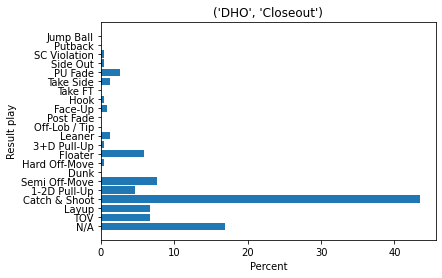

In [51]:
sample_threshold = 200

result_type_dict = {index: value for index, value in enumerate(result_types)}
result_type_dict[0] = "N/A"
for i in range(len(sequence_list)):
    if sequences[sequence_list[i]][-1] < sample_threshold:
        continue
    print("Points per sequence: ", sequences[sequence_list[i]][-2])
    print("Number of sequences: ", sequences[sequence_list[i]][-1])
    plt.barh(list(result_type_dict.values()), sequences[sequence_list[i]][:-2])
    plt.title(sequence_list[i])
    plt.xlabel("Percent")
    plt.ylabel("Result play")
    plt.show()


<BarContainer object of 9 artists>

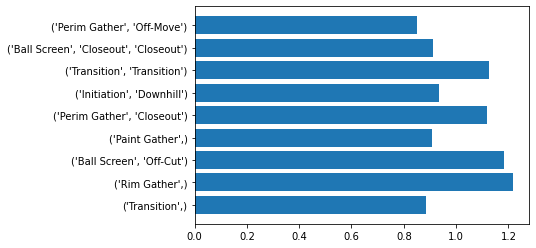

In [52]:
pt_threshold = 0.8

sequence_dict = {}
for i in range(len(sequence_list)):
    sequence_dict[sequence_list[i]] = sequences[sequence_list[i]]
key_seqs = [str(key) for key, value in sequence_dict.items() if value[-1] > sample_threshold and value[-2] > pt_threshold]
key_seq_pts = [value[-2] for key, value in sequence_dict.items() if value[-1] > sample_threshold and value[-2] > pt_threshold]
plt.barh(key_seqs, key_seq_pts)

Pts per sequence:  0.8832417582417582
Number of sequences:  728.0


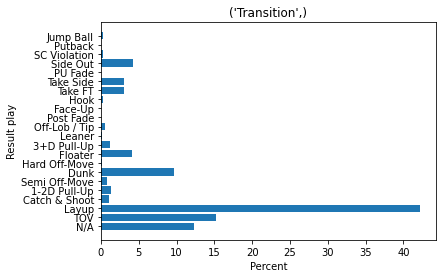

Pts per sequence:  1.2191780821917808
Number of sequences:  803.0


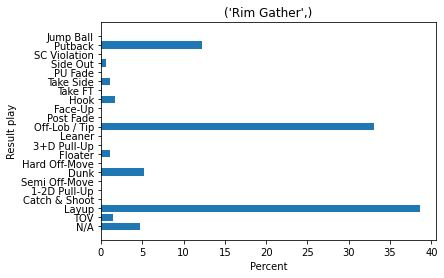

Pts per sequence:  1.184265010351967
Number of sequences:  483.0


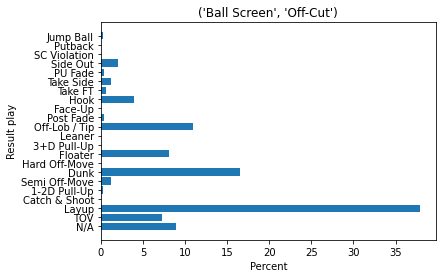

Pts per sequence:  0.9074889867841409
Number of sequences:  227.0


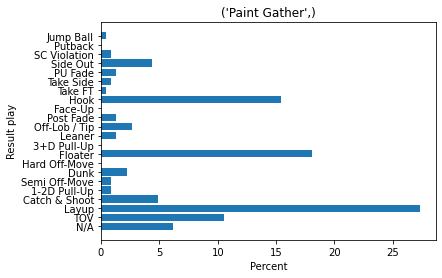

Pts per sequence:  1.1193415637860082
Number of sequences:  243.0


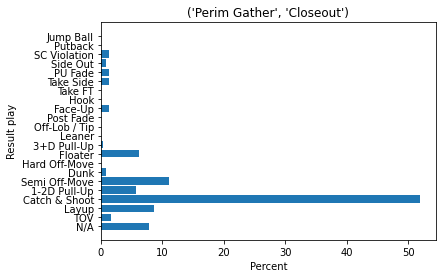

Pts per sequence:  0.9358490566037736
Number of sequences:  265.0


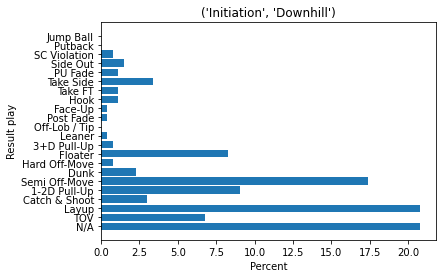

Pts per sequence:  1.127579737335835
Number of sequences:  533.0


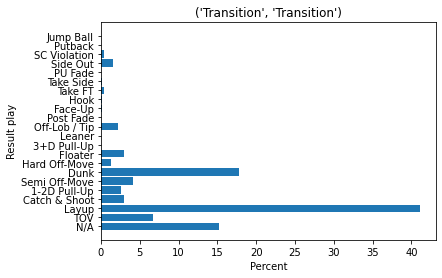

Pts per sequence:  0.9126984126984127
Number of sequences:  252.0


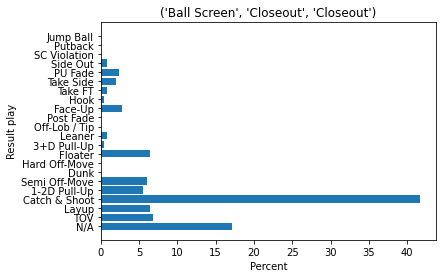

Pts per sequence:  0.851145038167939
Number of sequences:  262.0


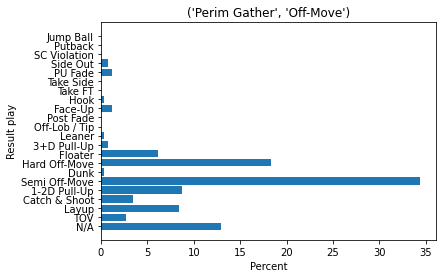

In [55]:
key_seqs = [key for key, value in sequence_dict.items() if value[-1] > sample_threshold and value[-2] > pt_threshold]

for key in key_seqs:
    print("Pts per sequence: ", sequence_dict[key][-2])
    print("Number of sequences: ", sequence_dict[key][-1])
    plt.barh(list(result_type_dict.values()), sequence_dict[key][:-2])
    plt.title(str(key))
    plt.xlabel("Percent")
    plt.ylabel("Result play")
    plt.show()
    

SyntaxError: invalid syntax (4203734180.py, line 4)